In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

scaler = MinMaxScaler()

### Number of advisors per hour
Read the planning from the excel file

In [2]:
gs_uri = 'gs://videotron-ai-bucket/'
dataset_path = gs_uri + 'dataset/'
df = pd.read_excel(dataset_path+'Planning intra-day 2020-01-01 au 2020-04-30.xlsx')
df = df.fillna(0.0)
df

,Stauts,Date nominale,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
0,Logged in,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,2,1,1,1,1,1,1,1,1,1
1,Logged in,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,6,4,4,3,2,2,1,1,1,1
2,Logged in,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,9,7,5,3,3,2,2,1,2,2
3,Logged in,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,3,3,2,2,2,1,1,1,1,1
4,Logged in,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,3,2,2,2,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Logged in,2020-04-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,3,2,3,3,1,1,1,1,1,1
117,Logged in,2020-04-27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,9,8,8,8,3,2,2,1,1,1
118,Logged in,2020-04-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,10,9,10,9,3,2,2,1,1,1
119,Logged in,2020-04-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,8,8,9,8,3,2,2,1,1,1


### Display an histograms of mean number of advisors in the IT call center of calls per hour of the day

Text(0.5, 0, 'Hour')

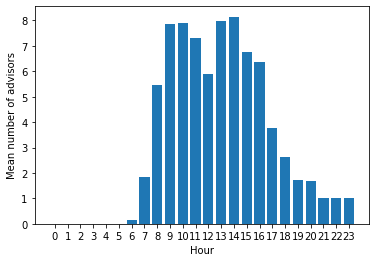

In [3]:
hours_cols = df.iloc[:,2:].columns.values
x = range(0, 24)
y = df[hours_cols].mean(axis=0).values

plt.bar(x, y)

plt.ylabel('Mean number of advisors')
plt.xticks(x)
plt.xlabel('Hour')

### Compute the avg number of advisors in the working hours

In [4]:
# Most calls happen in this period
working_hours_cols = ['08:00', '09:00', '10:00', '11:00', '12:00',
        '13:00', '14:00', '15:00', '16:00', '17:00']
df['date'] = pd.to_datetime(df['Date nominale'])
df['avg_num_advisors'] = df[hours_cols].mean(axis=1).round(1)
df['avg_num_advisors_8_to_5'] = df[working_hours_cols].mean(axis=1)
advisor_df = df[['date', 'avg_num_advisors','avg_num_advisors_8_to_5']]

advisor_df

,date,avg_num_advisors,avg_num_advisors_8_to_5
0,2020-01-01,1.1,1.9
1,2020-01-02,2.4,4.7
2,2020-01-03,3.2,6.2
3,2020-01-04,1.4,2.6
4,2020-01-05,1.3,2.4
...,...,...,...
116,2020-04-26,1.5,2.9
117,2020-04-27,4.0,8.2
118,2020-04-28,4.1,8.6
119,2020-04-29,3.6,7.5


### Daily Performance of the IT call center
The average times are in seconds

In [5]:
perfo_df = pd.read_csv(dataset_path + 'performance_centre_appels_sept2017_mars2020.csv', encoding='iso-8859-1')
perfo_df.columns = ['week_day', 'date', 'total_calls', 'accept', 'accept_percent', 'abandon', 'abandon_percent',
                'SLA', 'avg_time_treat', 'avg_time_engage', 'avg_time_accept', 'avg_time_abadon', 
                'max_time_accept', 'max_time_abandon', 'accept_percent_no_attend', 'abandon_during_ring',
                'abandon_short', 'other']
perfo_df.head()

,week_day,date,total_calls,accept,accept_percent,abandon,abandon_percent,SLA,avg_time_treat,avg_time_engage,avg_time_accept,avg_time_abadon,max_time_accept,max_time_abandon,accept_percent_no_attend,abandon_during_ring,abandon_short,other
0,Vendredi,2017-09-01,448,410,0.915179,38,0.084821,0.658482,487.897561,436.109756,124.582927,137.973684,962,849,0.243902,0,1,0
1,Samedi,2017-09-02,142,133,0.936620,9,0.063380,0.802817,364.285714,333.285714,78.804511,161.111111,1441,369,0.721805,0,0,0
2,Dimanche,2017-09-03,113,106,0.938053,7,0.061947,0.867257,279.584906,259.566038,51.481132,114.714286,402,354,0.471698,0,2,0
3,Lundi,2017-09-04,205,186,0.907317,19,0.092683,0.863415,407.005376,382.005376,27.666667,231.944444,449,1021,0.774194,1,2,0
4,Mardi,2017-09-05,787,698,0.886912,89,0.113088,0.592122,417.938395,381.512894,146.882521,148.918605,683,681,0.163324,3,4,1


### Average daily abandon percentage

#### First objective: **Drop goal 10%**:
Percentage Total of abandoned calls per day. The objective is to reach an average daily percentage of abandoned calls less than or equal to **10%** of all calls Receipts


* Current average daily percentage of abandoned calls is 20% for year 2020. So we need to divide by two this metric
* Given the strong correlation between abandon percentage and average wait time, reducing average wait time will decrease abandon percentage

In [6]:
# Convert the average time from minutes to hours
perfo_df['avg_time_accept_min'] = perfo_df['avg_time_accept'] / 60.
perfo_df['avg_time_abandon_min'] = perfo_df['avg_time_abadon'] / 60.

# Set he abandon percentage
perfo_df['abandon_percentage'] = perfo_df['abandon_percent'] * 100.

# Define the start of the test period
test_df = perfo_df[perfo_df['date'] >= '2020-01-01'].copy()

#
mean_abandon = test_df['abandon_percentage'].mean()
print('Mean abandon percentage on the test period: %.2f%%' % mean_abandon)

Mean abandon percentage on the test period: 19.99%


### Compute the correlation between average waiting time and abandon percentage

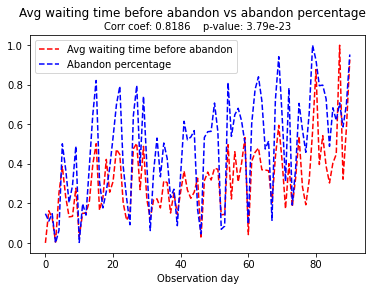

In [7]:
x  = range(test_df.shape[0])

# Scale the data
scaler.fit(test_df[['avg_time_abandon_min', 'abandon_percentage']])
y = scaler.transform(test_df[['avg_time_abandon_min', 'abandon_percentage']])
y1 = y[:, 0]
y2 = y[:, 1]

# Do a pearson correlation analysis
pearson_r , p_val = stats.pearsonr(y1, y2)
title_str = 'Corr coef: {0:.4f}    p-value: {1:.2e}'.format(pearson_r , p_val)

plt.suptitle('Avg waiting time before abandon vs abandon percentage')
plt.title(title_str, size=10)
plt.plot(x, y1, 'r--', label='Avg waiting time before abandon') 
plt.plot(x, y2, 'b--', label='Abandon percentage')
plt.xlabel('Observation day')
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


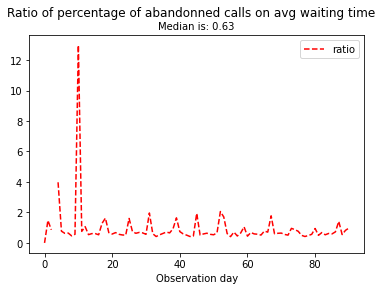

The median ratio of percentage of abandonned calls on avg waiting time is 0.63


In [8]:
meadian_ratio = np.median(y1/y2)

plt.plot(x, y1/y2, 'r--', label='ratio') 
plt.suptitle('Ratio of percentage of abandonned calls on avg waiting time')
plt.title('Median is: {0:.2f}'.format(meadian_ratio), size=10)
plt.xlabel('Observation day')
plt.legend()
plt.show()

print('The median ratio of percentage of abandonned calls on avg waiting time is {0:.2f}'.format(meadian_ratio))

### Compute the correlation between the number of calls and the waiting time

Corr coef: 0.3767, p-value: 2.33e-04


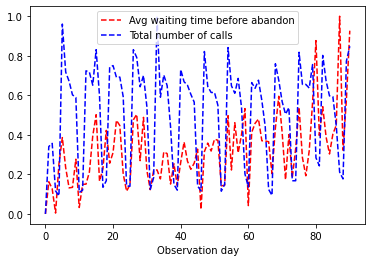

In [9]:
x  = range(test_df.shape[0])

# Scale the data
scaler.fit(test_df[['avg_time_abandon_min', 'total_calls']])
y = scaler.transform(test_df[['avg_time_abandon_min', 'total_calls']])
y1 = y[:, 0]
y2 = y[:, 1]

# Do a pearson correlation analysis
pearson_r , p_val = stats.pearsonr(y1, y2)
print('Corr coef: %.4f, p-value: %.2e' % (pearson_r , p_val))

plt.plot(x, y1, 'r--', label='Avg waiting time before abandon') 
plt.plot(x, y2, 'b--', label='Total number of calls')
plt.xlabel('Observation day')
plt.legend()
plt.show()

### Daily wait time

#### Second objective: 
* The curent weekly waiting time is 550 hours
* The objective is to reduce the weekly waiting time to 300 hours 
* A week is from monday to sunday

* The waiting time is depends on the volume of calls (see correlation analysis above)
* **time to lose**: operational time we could save on IT call center ressources. THis means we could've let the clients wait more time to reduce call center capacity and therefore reduce the opertional cost of the IT call center
* **time to gain**: hours worked by the Videotron's employee. This means we should answer quicker by increasing capacity when required. The Videotron's employee will wait less time when they call the IT center and thereore will be more productive


#### Assumption: We assume that if given the perfectly accurate prediction of number of calls, the call center management will be able to allocate exact number of advisors to keep desire average wait time

In [11]:
test_df.columns.values

array(['week_day', 'date', 'total_calls', 'accept', 'accept_percent',
       'abandon', 'abandon_percent', 'SLA', 'avg_time_treat',
       'avg_time_engage', 'avg_time_accept', 'avg_time_abadon',
       'max_time_accept', 'max_time_abandon', 'accept_percent_no_attend',
       'abandon_during_ring', 'abandon_short', 'other',
       'avg_time_accept_min', 'avg_time_abandon_min',
       'abandon_percentage'], dtype=object)

In [12]:
test_df['avg_time_abandon_min']

852     0.500000
853     4.936275
854     3.978030
855     0.616667
856     7.370833
         ...    
938    12.725094
939    27.763889
940     9.288889
941    16.305106
942    25.770735
Name: avg_time_abandon_min, Length: 91, dtype: float64

In [13]:
test_df

,week_day,date,total_calls,accept,accept_percent,abandon,abandon_percent,SLA,avg_time_treat,avg_time_engage,...,avg_time_abadon,max_time_accept,max_time_abandon,accept_percent_no_attend,abandon_during_ring,abandon_short,other,avg_time_accept_min,avg_time_abandon_min,abandon_percentage
852,Mercredi,2020-01-01,27,25,0.925926,2,0.074074,0.814815,384.880000,312.280000,...,30.000000,750,36,0.640000,0,0,0,1.324000,0.500000,7.407407
853,Jeudi,2020-01-02,285,268,0.940351,17,0.059649,0.603509,366.619403,310.440298,...,296.176471,1526,1016,0.511194,0,1,0,3.905286,4.936275,5.964912
854,Vendredi,2020-01-03,297,275,0.925926,22,0.074074,0.663300,458.356364,412.469091,...,238.681818,1417,1029,0.545455,0,1,0,3.881394,3.978030,7.407407
855,Samedi,2020-01-04,115,113,0.982609,2,0.017391,0.808696,363.079646,321.415929,...,37.000000,1216,68,0.690265,0,1,1,1.876401,0.616667,1.739130
856,Dimanche,2020-01-05,96,92,0.958333,4,0.041667,0.718750,436.108696,381.576087,...,442.250000,1357,1236,0.565217,0,0,0,2.134420,7.370833,4.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,Vendredi,2020-03-27,365,272,0.745205,93,0.254795,0.145205,610.566176,552.172794,...,763.505618,3494,2782,0.058824,4,3,2,21.063664,12.725094,25.479452
939,Samedi,2020-03-28,187,133,0.711230,54,0.288770,0.224599,501.105263,444.451128,...,1665.833333,8123,6409,0.172932,0,2,0,32.897995,27.763889,28.877005
940,Dimanche,2020-03-29,161,122,0.757764,39,0.242236,0.279503,437.696721,388.016393,...,557.333333,3916,2522,0.270492,0,1,0,15.845765,9.288889,24.223602
941,Lundi,2020-03-30,612,437,0.714052,175,0.285948,0.194444,557.473684,501.304348,...,978.306358,4221,3451,0.068650,2,1,7,28.223722,16.305106,28.594771


In [14]:
test_df['accept_time_gains']  = (test_df['avg_time_accept_min']  - WAITING_TIME_GOAL) * test_df['accept']  / 60
test_df['abandon_time_gains'] = (test_df['avg_time_abandon_min'] - WAITING_TIME_GOAL) * test_df['abandon'] / 60

print("accept time to lose", test_df.loc[test_df['accept_time_gains'] < 0, 'accept_time_gains'].sum(), 'hours')
print("accept time to gain", test_df.loc[test_df['accept_time_gains'] > 0, 'accept_time_gains'].sum(), 'hours')
#
print("abandon time to lose", test_df.loc[test_df['abandon_time_gains'] < 0, 'abandon_time_gains'].sum(), 'hours')
print("abandon time to gain", test_df.loc[test_df['abandon_time_gains'] > 0, 'abandon_time_gains'].sum(), 'hours')

accept time to lose -243.70861110599168 hours
accept time to gain 3953.3122224082776 hours
abandon time to lose -28.95687538491389 hours
abandon time to gain 675.8711524366945 hours


### Weekly wait time
Compute the weekly wait time in hours during the test period.

Reminder: the average times are in second in the dataframe

In [33]:
test_df['total_time_accept']  = (test_df['avg_time_accept'] * test_df['accept']) / (60 * 60)
test_df['total_time_abandon'] = (test_df['avg_time_abadon'] * test_df['abandon']) /  (60 * 60)
test_df['total_time'] = test_df['total_time_accept'] + test_df['total_time_abandon']
test_df['total_time_desire']  = 300/7 # The desired time is the weekly objective #test_df['total_calls'] * WAITING_TIME_GOAL / 60
#
test_df['date'] = pd.to_datetime(test_df['date'])

In [50]:
out_df = test_df[['date', 'total_calls', 'total_time_accept', 'total_time_abandon', 'total_time', 'total_time_desire']]
out_df = test_df.resample('W-Mon', on='date')\
          .agg({'total_calls': np.sum,
                'total_time_accept' : np.sum, 
                'total_time_abandon' : np.sum,
                'total_time': np.sum,
                'total_time_desire' : np.sum}).reset_index()\
          .sort_values(by='date')

out_df['mean_waiting_time (minutes)'] = (out_df['total_time']/out_df['total_calls'])*60

# Compute the desired waiting time per call every week in order to achieve the 300 hours of waiting time per week
out_df['mean_waiting_time_desired (minutes)'] = (out_df['total_time_desire']/out_df['total_calls'])*60
out_df['week'] = out_df['date'].apply(lambda x: x.strftime('%U'))
out_df['year'] = out_df['date'].apply(lambda x: x.strftime('%Y'))

# #
# print('Total desired weekly waiting time: %d hours' % out_df['total_time_desire'].mean())
out_df

,date,total_calls,total_time_accept,total_time_abandon,total_time,total_time_desire,mean_waiting_time (minutes),mean_waiting_time_desired (minutes),week,year
0,2020-01-06,1574,197.718889,32.423889,230.142778,257.142857,8.772914,9.802142,01,2020
1,2020-01-13,2863,269.571667,35.200678,304.772345,300.000000,6.387126,6.287111,02,2020
2,2020-01-20,3096,553.461111,109.644346,663.105457,300.000000,12.850881,5.813953,03,2020
3,2020-01-27,3095,636.373333,140.391343,776.764676,300.000000,15.058443,5.815832,04,2020
4,2020-02-03,3206,587.651667,127.817778,715.469444,300.000000,13.389946,5.614473,05,2020
5,2020-02-10,2750,350.370556,54.363126,404.733681,300.000000,8.830553,6.545455,06,2020
6,2020-02-17,2891,476.483056,87.031916,563.514971,300.000000,11.695226,6.226219,07,2020
7,2020-02-24,2860,543.780556,133.907082,677.687638,300.000000,14.217223,6.293706,08,2020
8,2020-03-02,2826,525.653889,120.237563,645.891452,300.000000,13.713194,6.369427,09,2020
9,2020-03-09,2690,591.743056,154.143950,745.887006,300.000000,16.636885,6.691450,10,2020


### Compute the mean desired waiting time by call every week of the test period

In [62]:
out_df.loc[0,'year']

'2020'

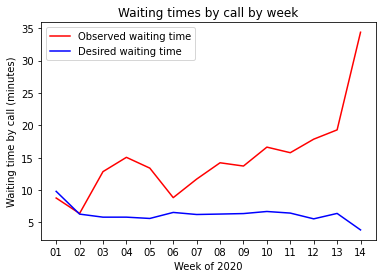

In [70]:
y1 = out_df['mean_waiting_time (minutes)'].values
y2 = out_df['mean_waiting_time_desired (minutes)'].values
x = out_df['week'].values

plt.plot(x, y1, 'r', label='Observed waiting time')
plt.plot(x, y2, 'b', label='Desired waiting time')
plt.ylabel('Waiting time by call (minutes)')
plt.xlabel('Week of ' + str(out_df.loc[0,'year']))
plt.title('Waiting times by call by week')
plt.legend()

plt.show()

In [57]:
current_waiting_time = out_df['mean_waiting_time (minutes)'].mean()
WAITING_TIME_GOAL = out_df['mean_waiting_time_desired (minutes)'].mean()

print('During the test period, the current waiting time for 1 call is: %.1f minutes' % current_waiting_time)
print('During the test period, the desired waiting time for 1 call is: %.1f minutes' % WAITING_TIME_GOAL)

During the test period, the current waiting time for 1 call is: 14.9 minutes
During the test period, the desired waiting time for 1 call is: 6.3 minutes


In [58]:
avg_abandon_percent_desired = test_df[test_df['avg_time_abandon_min'] <= WAITING_TIME_GOAL][['abandon_percentage']].mean()
print('Average percentage of abandonned calls desired: %.2f%%' % avg_abandon_percent_desired)

Average percentage of abandonned calls desired: 8.39%


### Join with number of advisors

- Can get the number of calls per hour to join with number of advisors per hour for next step


### Temporary Conclusion

- if ratio between average number of call volume per hour and average number of advisors per hours is < 5, then average wait time should be within 7 minutes desired wait time

### Average ratio between average number of calls and average number of advisors per hour that result in wait time less than optimal wait time

In [ ]:
test = test[['date', 'total_calls', 'accept_percent', 'abandon_percent', 'avg_time_accept_min', 'avg_time_abandon_min']]
test['date'] = pd.to_datetime(test['date'])
test = test.merge(advisor_df, on='date', how='inner')
test['ratio_call_advisor'] = (test['total_calls'] / 10) / test['avg_num_adv']
#
test[(test['avg_time_accept_min'] < WAITING_TIME_GOAL) & (test['avg_time_abandon_min'] < WAITING_TIME_GOAL)]['ratio_call_advisor'].mean()

### Average ratio between average number of calls and average number of advisors per hour that result in wait time more than the optimal wait time

In [ ]:
test[(test['avg_time_accept_min'] > WAITING_TIME_GOAL) & (test['avg_time_abandon_min'] > WAITING_TIME_GOAL)]['ratio_call_advisor'].mean()

### ROI with Prediction

In [ ]:
def cast_CCT_features(df):
    dates_list = ['Submit_Date','Reported_Date','Required_Resolution_DateTime','Responded_Date','Last_Resolved_Date','closed_date']
    for col in dates_list:
        df[col] = pd.to_datetime(df[col].fillna('1900-01-01 00:00:00.000'))
        df[col + '_day'] = df[col].apply(lambda x: x.strftime('%Y-%m-%d')) # To group by day
        df[col + '_with_hour'] =df[col].apply(lambda x: x.strftime('%Y-%m-%d %H:00')) # To group by day
    return df

In [ ]:
result_path = gs_uri + 'results/'

preds = pd.read_csv(result_path + 'ticket_count_prediction_202005062015.csv')
preds['date'] = pd.to_datetime(preds['date'])
#
perf = pd.read_csv(dataset_path + 'performance_centre_appels_sept2017_mars2020.csv', encoding='iso-8859-1')
perf.columns = ['week_day', 'date', 'total_calls', 'accept', 'accept_percent', 'abandon', 'abandon_percent',
                'SLA', 'avg_time_treat', 'avg_time_engage', 'avg_time_accept', 'avg_time_abadon', 
                'max_time_accept', 'max_time_abandon', 'accept_percent_no_attend', 'abandon_during_ring',
                'abandon_short', 'other']
perf['date'] = pd.to_datetime(perf['date'])
perf = perf[['date', 'total_calls', 'avg_time_accept', 'avg_time_abadon']]
#
inci = pd.read_csv(dataset_path + 'IncidentsCTT20170930_2.csv', encoding="ISO-8859-1", low_memory=False)
inci = inci.loc[~inci['Submitter'].str.contains('SYSTEM')]
inci = cast_CCT_features(inci)
groupby = inci.groupby('Submit_Date_day')
agg_df = pd.DataFrame(groupby['status'].count().reset_index().values, columns=['Submit_Date_day', 'Ticket cnt'])
agg_df['total_real_calls'] = agg_df['Ticket cnt'].astype(int)
agg_df['date'] = pd.to_datetime(agg_df['Submit_Date_day'])
agg_df = agg_df[['date', 'total_real_calls']]

In [ ]:
final = preds[['date', 'ticket cnt pred']]\
                .merge(perf[['date', 'total_calls', 'avg_time_accept', 'avg_time_abadon']], 
                       on='date', how='left')\
                .merge(agg_df, on='date', how='left')
final.head()

### Optimal case with perfect prediction

In [ ]:
final['accept_time_gains']  = (final['avg_time_accept']/60.  - 7.) * final['total_real_calls']  / 60
#
print("accept time to lose", final.loc[final['accept_time_gains'] < 0, 'accept_time_gains'].sum(), 'hours')
print("accept time to gain", final.loc[final['accept_time_gains'] > 0, 'accept_time_gains'].sum(), 'hours')

### With prediction

- Assume that the difference between predicted and total calls have a direct linear impact on the average wait time
- The result suggests that the prediction tend to over-predict, which benefits time to gain, and at the same time increase time to lose

In [ ]:
final['avg_time_pred'] = (final['total_real_calls'] / final['ticket cnt pred']) * 7.
#
final['pred_time_gains']  = (final['avg_time_accept']/60. - final['avg_time_pred']) * final['total_real_calls'] /60.

cost_IT_call_center = int(final.loc[final['pred_time_gains'] < 0, 'pred_time_gains'].sum())
cost_WT_Videotron_employee = int(final.loc[final['pred_time_gains'] > 0, 'pred_time_gains'].sum())


print("pred time to lose (3 months): %d hours" % cost_IT_call_center)
print("pred time to gain (3 months): %d hours" % cost_WT_Videotron_employee)

In [ ]:
plt.plot(range(final.shape[0]), final['ticket cnt pred'], 'r--', label='Predict') 
plt.plot(range(final.shape[0]), final['total_real_calls'], 'b--', label='Real')
plt.xlabel('Observation day')
plt.legend()
plt.show()

### Compute the annualize ROI from the 3 months of test
Multiply by 4 the results
* Hourly rate for the employee in the IT call center: 50$ per hour

* Hourly rate for the Videotron employee when they call the IT center: 110$ per hour

In [ ]:
print("Cost to lose", cost_IT_call_center * 50 * 4)
print("Cost to gain", cost_WT_Videotron_employee * 110 * 4)

In [ ]:
rate_1 = 50
rate_2 = 110

cost_IT_call_center_annualize = -1*cost_IT_call_center*4
cost_WT_Videotron_employee_annualize = cost_WT_Videotron_employee*4

print('Number of hours saved in the IT call center every year: %d' % cost_IT_call_center_annualize)
print('Number of hours of waiting time saved for the Videotron\'s employee: %d' % cost_WT_Videotron_employee_annualize)

print('Cost saved in the IT call center every year: %d$' % (cost_IT_call_center_annualize*rate_1))
print('Cost on waiting time saved for the Videotron\'s employee: {:9,.0f}$\n'.format(cost_WT_Videotron_employee_annualize*rate_2))


total_ROI = cost_IT_call_center_annualize*rate_1+cost_WT_Videotron_employee_annualize*rate_2
print(56*'*')
print('Total potential ROI of the project on 1 year: {:9,.0f}$'.format(total_ROI))
print(56*'*')